In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne

In [3]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [4]:
ri.set_lo(900.)

In [5]:
import kid_readout.utils.sweeps

In [6]:
nsamp = 2**18
df = 512.0/nsamp
fr = kid_readout.utils.sweeps.prepare_sweep(ri,center_freqs=np.array([850.,950.]),offsets=df*np.arange(-4,4),nsamp=nsamp)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [7]:
fr

array([[ 849.9921875 ,  949.9921875 ],
       [ 849.99414062,  949.99414062],
       [ 849.99609375,  949.99609375],
       [ 849.99804688,  949.99804688],
       [ 850.        ,  950.        ],
       [ 850.00195312,  950.00195312],
       [ 850.00390625,  950.00390625],
       [ 850.00585938,  950.00585938]])

In [8]:
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,reads_per_step=2,nchan_per_step=2)

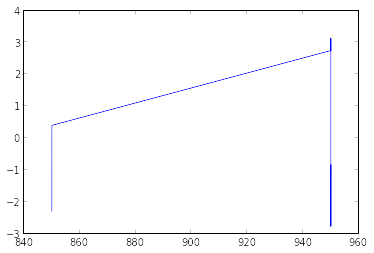

In [9]:
plot(swp.freqs,np.angle(swp.data))

In [10]:
fr,s21,err = swp.select_index(0)

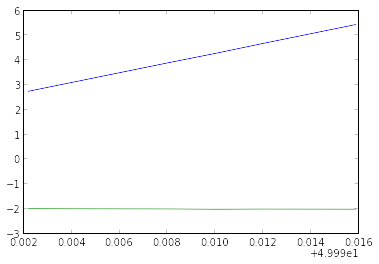

In [11]:
fr,s21,err = swp.select_index(0)
plot(fr-900,np.unwrap(np.angle(s21)))
plot(fr-900,np.unwrap(np.angle(s21*np.exp(-31.5j*(fr-900)*np.pi*2))))

In [12]:
31.5*512

16128.0

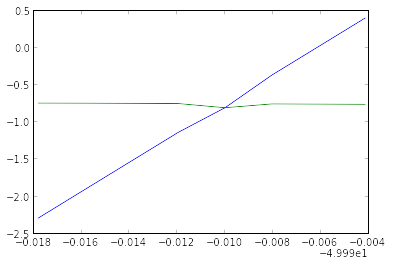

In [13]:
fr,s21,err = swp.select_index(1)
plot(fr-900,np.unwrap(np.angle(s21)))
plot(fr-900,np.unwrap(np.angle(s21*np.exp(-31.5j*(fr-900)*np.pi*2))))

In [14]:
s21.imag

array([-0.00525002, -0.00659718, -0.00697236, -0.00633225, -0.00546951,
       -0.00251154,  0.0001133 ,  0.00272071])

In [15]:
ri.r.write_int('debug',0)